<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instructions" data-toc-modified-id="Instructions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Instructions</a></span></li><li><span><a href="#Flyhomes-Data-Science-Take-home-Assignment" data-toc-modified-id="Flyhomes-Data-Science-Take-home-Assignment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Flyhomes Data Science Take-home Assignment</a></span><ul class="toc-item"><li><span><a href="#Feature-Dictionary" data-toc-modified-id="Feature-Dictionary-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature Dictionary</a></span><ul class="toc-item"><li><span><a href="#House-ID-Features" data-toc-modified-id="House-ID-Features-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>House ID Features</a></span></li><li><span><a href="#Sale-Features" data-toc-modified-id="Sale-Features-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Sale Features</a></span></li><li><span><a href="#Area-Features" data-toc-modified-id="Area-Features-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Area Features</a></span></li><li><span><a href="#Room-Features" data-toc-modified-id="Room-Features-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Room Features</a></span></li><li><span><a href="#Tax-Assessment-Features" data-toc-modified-id="Tax-Assessment-Features-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Tax Assessment Features</a></span></li><li><span><a href="#Home-Owner's-Association-Features" data-toc-modified-id="Home-Owner's-Association-Features-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Home Owner's Association Features</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Target</a></span></li></ul></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results</a></span></li></ul></div>

# Instructions

# Flyhomes Data Science Take-home Assignment

One of Flyhomes' flagship products is the Trade-Up program - a program which enables customers who own houses, to purchase their next house knowing that they'll have a minimum bid. In order to do this, Flyhomes rigorously prices houses to get a solid understanding of what a house will sell for. 

In this exercise, you've been given data from two main data sources: listing data, and county record data. Listing data is how the house is represented by the realtors for sale - it includes when the house entered and exited the market, how long it was on the market, what was the requested price and eventually what the house was sold for. County record data includes records of house details, as well as what the county assesses the house to be worth. 

We want you to **build a model which will predict the sale price of the house, when the house is listed**. Your goal will be to minimize Median Absolute Error. Be sure to include thoughts and observations, and be prepared to walkthrough your work and thought processes. We've provided Jupyter Notebooks in R and Python to get you started. It's not required that you code in R or Python, (or in Jupyter) but please be sure to include and communicate your analysis, model development process and any thoughts you have along the way. **We're more concerned with your methodology and insights than the exact performance of the final model**

If you have time, please consider:

1) How does your solution scale?

2) How would you deploy this into production?

3) What would be your next steps to improve the predictions?

4) What other metrics would you consider using and reporting?

## Feature Dictionary

### House ID Features
- **house.id :** An identifier number for each house.
- **house.latitude :** A scaled representation of the house's latitude.
- **house.longitude :** A scaled representation of the house's longitude.
- **house.city :** An identifier for the house's city.
- **house.zip :** An identifier for the house's zip code. 
### Sale Features
- **listing.original_price :** The price that the house was listed at for sale. 
- **listing.list_date :** The date that the house went on the market. This is when we'll be making our prediction.
- **listing.pending_date :** The date that the winning offer was accepted.
- **listing.sold_date :** The date that the sale was completed.
- **derived.days_on_market :** The number of days between when the house was listed, and when a winning offer was accepted.
- **listing.property_type :** This is a categorical feature indicating whether the property is a House (Home) or a Townhouse. 
### Area Features
- **record.sqft :** This represents the area of the house (in square feet) according to property records. 
- **listing.sqft :** This represents the area of the house (in square feet) according to the house listing. 
- **record.1st_floor_sqft :** This represents the area (in square feet)  of the first floor of the house according to property records. 
- **record.2nd_floor_sqft :** This represents the area (in square feet)  of the second floor of the house according to property records.
- **record.garage_sqft :** This represents the area (in square feet) of the house's garage (if any), according to property records.
- **record.deck_sqft :** This represents the area (in square feet) of the house's deck (if any), according to property records.
- **listing.lot_sqft :** This represents the area (in square feet) of the parcel of land the house is on, according to the property listing. 
- **record.lot_sqft :** This represents the area (in square feet) of the parcel of land the house is on, according to the property records. 
- **record.building_sqft :** This represents the area (in square feet) of the land that the building inhabits according to the propert records. 
- **derived.land_sqft :** This is the inferred area of the non-building land that comes with the parcel, derived from the property records. It is defined as `record.lot_sqft - record.building_sqft`
### Room Features
- **record.bedrooms :** This is the number of bedrooms in the house according to property records. 
- **listing.bedrooms :** This is the number of bedrooms in the house according to the property listing. 
- **listing.bathrooms :** This is the number of bathrooms in the house according to the property listing. It's (generally) determined by the equation `(1 * number_of_full_baths) + (.75 * number_of_three_quarter_baths) + (.5 * number_of_half_baths)`
- **record.bathroom_count :** This is the whole number of rooms in the house that can be considered bathrooms according to the property records. It's (generally) determined by the equation `number_of_full_baths + number_of_three_quarter_baths + number_of_half_baths`
- **record.partial_bathroom_count :** This is the whole number of rooms which in the house that are not considered to be full baths according to the property records. `number_of_three_quarter_baths + number_of_half_baths`
### Tax Assessment Features
- **record.tax_year_assessed :** This is the year in which the tax records were taken. 
- **record.tax_assessed_value_total :** This is the total assessed value of the property, both building and land. 
- **record.tax_assessed_value_building :** This is the assessed value of the building on the property.
- **record.tax_assessed_value_land :** This is the assessed value of the land the property sits on. 
- **derived.total_value_per_sqft :** This is a derived feature which represents the value of the property normalized via square feet of the building. This is a common metric that is used in real estate. `record.tax_assessed_value_total / record.sqft`
- **derived.building_value_per_sqft :** This is a derived feature which represents the value of the building normalied by the square footage of the building. `record.tax_assessed_value_building / record.sqft`
- **derived.land_value_per_sqft :** This is the derived feature which represents the value of each square foot of land in the property based solely on land value. `record.tax_assessed_value_land / record.lot_size`
### Home Owner's Association Features
- **listings.hoa_fee :** What the owner must pay monthly in home-owner association fees. 
### Target
- **target.sale_price :** What the house actually sold for. This is what you're trying to predict.

# Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
train = pd.read_csv('flyhomes_train.csv', index_col = 0)
test = pd.read_csv('flyhomes_test.csv', index_col = 0)
preds = pd.read_csv('example_predictions.csv', index_col =0)

# Exercise

In [4]:
train.head()

,house.id,house.latitude,house.longitude,house.city,house.zip,listing.list_price,listing.list_date,listing.pending_date,listing.sold_date,derived.days_on_market,...,record.partial_bathroom_count,record.tax_year_assessed,record.tax_assessed_value_total,record.tax_assessed_value_bldg,record.tax_assessed_value_land,derived.total_value_per_sqft,derived.building_value_per_sqft,derived.land_value_per_sqft,listing.hoa_fee,target.sale_price
0,0,0.639721,0.275937,2,2,1380000.0,2017-09-14,2017-09-26,2017-11-15,12.0,...,1,2018.0,1471000.0,786000.0,685000.0,423.0,226.0,56.313713,24.0,1370000.0
1,1,0.544666,0.253989,5,5,475000.0,2018-08-17,2018-12-04,2018-12-28,109.0,...,2,2018.0,373000.0,173000.0,200000.0,200.0,93.0,24.906600,0.0,405000.0
3,3,0.503141,0.622518,7,7,845000.0,2016-07-14,2016-07-21,2016-09-06,7.0,...,3,2018.0,1160000.0,750000.0,410000.0,197.0,127.0,1.631250,0.0,845000.0
4,4,0.382359,0.043537,10,10,1198000.0,2018-09-19,2018-10-06,2018-10-31,17.0,...,4,2018.0,887000.0,745000.0,142000.0,197.0,166.0,2.884889,0.0,1198000.0
5,5,0.929275,0.123331,11,11,775000.0,2017-03-08,2017-03-15,2017-03-31,7.0,...,1,2018.0,844000.0,526000.0,318000.0,300.0,187.0,26.566416,0.0,762500.0


In [3]:
df = train.copy()
#df['days_on_market'] = df[]

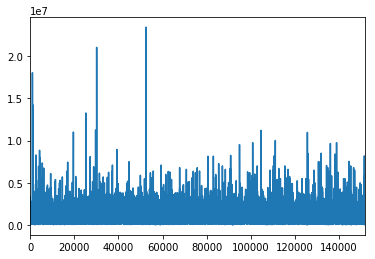

In [12]:
df['target.sale_price'].plot()
plt.show()

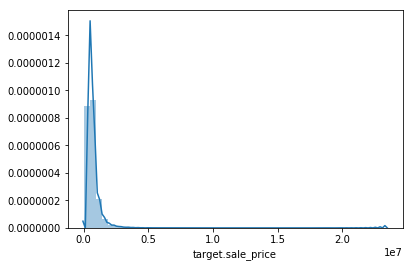

In [23]:
sns.distplot(df['target.sale_price'])


In [38]:
aa = df.loc[:,['house.latitude', 'house.longitude','target.sale_price']]

In [4]:
df.columns[df.isna().any()]

Index(['house.latitude', 'house.longitude', 'listing.sold_date',
       'derived.days_on_market', 'record.sqft', 'record.1st_floor_sqft',
       'record.2nd_floor_sqft', 'record.garage_sqft', 'record.deck_sqft',
       'listing.lot_sqft', 'record.tax_year_assessed',
       'record.tax_assessed_value_total', 'record.tax_assessed_value_bldg',
       'record.tax_assessed_value_land', 'derived.total_value_per_sqft',
       'derived.building_value_per_sqft', 'derived.land_value_per_sqft',
       'listing.hoa_fee'],
      dtype='object')

In [9]:
df['house.city'].value_counts()

11     31901
5       7248
18      6106
2       5987
61      5674
16      4993
24      4574
41      4458
35      4165
21      2997
38      2863
63      2689
60      2099
71      1649
46      1618
88      1490
26      1452
29      1434
37      1305
34      1251
39      1214
7       1172
13       960
65       958
81       830
23       767
10       664
48       634
95       536
98       415
47       357
6        310
68       294
15       262
92       229
97       204
101      196
54       109
110       62
80        41
102       37
91        35
99        32
115       26
107       18
113       14
43         9
124        9
127        5
28         3
Name: house.city, dtype: int64

In [64]:
df[df['record.tax_assessed_value_total'].isna()]

,house.id,house.latitude,house.longitude,house.city,house.zip,listing.list_price,listing.list_date,listing.pending_date,listing.sold_date,derived.days_on_market,...,record.partial_bathroom_count,record.tax_year_assessed,record.tax_assessed_value_total,record.tax_assessed_value_bldg,record.tax_assessed_value_land,derived.total_value_per_sqft,derived.building_value_per_sqft,derived.land_value_per_sqft,listing.hoa_fee,target.sale_price
2189,1766,0.543947,0.552232,7,7,783290.0,2018-02-02,2018-02-05,2018-07-02,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,835575.0
8995,7267,0.746877,0.166575,11,93,1098000.0,2018-06-21,2018-06-21,2018-06-21,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1120000.0
9752,7896,0.317412,0.170773,61,102,599950.0,2017-08-04,2017-11-13,2018-06-21,101.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,622214.0
16829,13630,0.935513,0.258175,60,152,949995.0,2018-02-05,2018-02-05,2018-06-29,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,977759.0
17053,13807,0.528177,0.286384,5,27,974990.0,2017-12-13,2018-04-06,2018-06-08,114.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,980000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140442,113790,0.645862,0.361392,21,48,1219950.0,2017-03-10,2017-03-10,2018-07-25,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1219950.0
142232,115234,0.585020,0.469294,26,32,840915.0,2017-10-14,2017-10-25,2018-07-12,11.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,983882.0
143258,116037,0.730877,0.155332,11,39,615000.0,2015-04-17,2015-04-26,2015-05-29,9.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,600000.0
148004,119818,0.176713,0.168530,41,94,472950.0,2018-02-27,2018-02-28,2018-06-27,1.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,473600.0


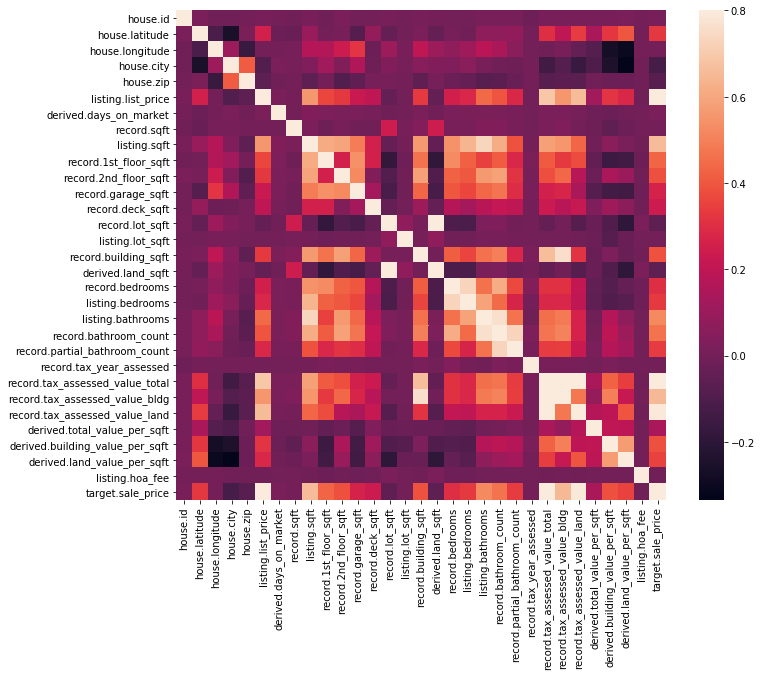

In [5]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [55]:
df[df['house.longitude'].isna()]

,house.id,house.latitude,house.longitude,house.city,house.zip,listing.list_price,listing.list_date,listing.pending_date,listing.sold_date,derived.days_on_market,...,record.partial_bathroom_count,record.tax_year_assessed,record.tax_assessed_value_total,record.tax_assessed_value_bldg,record.tax_assessed_value_land,derived.total_value_per_sqft,derived.building_value_per_sqft,derived.land_value_per_sqft,listing.hoa_fee,target.sale_price
467,370,NaN,NaN,54,85,827995.0,2018-05-23,2018-09-18,2019-07-18,118.0,...,0,2018.0,0.0,0.0,0.0,NaN,NaN,0.000000,88.0,939899.0
3017,2429,NaN,NaN,54,85,1165120.0,2018-07-17,2018-11-08,2018-12-06,114.0,...,1,2018.0,1056000.0,794000.0,262000.0,636.0,478.0,231.858407,0.0,975000.0
3105,2506,NaN,NaN,11,14,719950.0,2018-12-04,2018-12-27,2019-01-29,23.0,...,1,2018.0,334000.0,134000.0,200000.0,187.0,75.0,203.252033,70.0,705000.0
3182,2560,NaN,NaN,54,85,859995.0,2018-06-01,2018-06-01,2019-04-18,NaN,...,0,2018.0,0.0,0.0,0.0,NaN,NaN,0.000000,88.0,963360.0
3304,2656,NaN,NaN,11,40,775000.0,2018-09-04,2018-11-16,2018-12-21,73.0,...,0,2018.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,725000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148458,120190,NaN,NaN,5,5,1099950.0,2018-06-01,2018-12-24,2019-02-28,206.0,...,2,2018.0,0.0,0.0,0.0,0.0,0.0,0.000000,163.0,999950.0
149766,121254,NaN,NaN,46,69,485000.0,2015-01-23,2015-01-27,2015-05-18,4.0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,490300.0
150177,121566,NaN,NaN,11,101,1200000.0,2018-10-09,2018-10-18,2018-11-13,9.0,...,2,2018.0,1031000.0,786000.0,245000.0,409.0,311.0,56.231352,0.0,1090000.0
150613,121919,NaN,NaN,18,20,649950.0,2018-03-29,2018-03-28,2018-11-16,-1.0,...,0,2018.0,0.0,0.0,0.0,0.0,0.0,0.000000,62.0,649950.0


In [56]:
df['target.sale_price'].describe()

count    1.063550e+05
mean     6.842313e+05
std      5.150332e+05
min      3.500000e+04
25%      3.950000e+05
50%      5.700000e+05
75%      8.017430e+05
max      2.337500e+07
Name: target.sale_price, dtype: float64

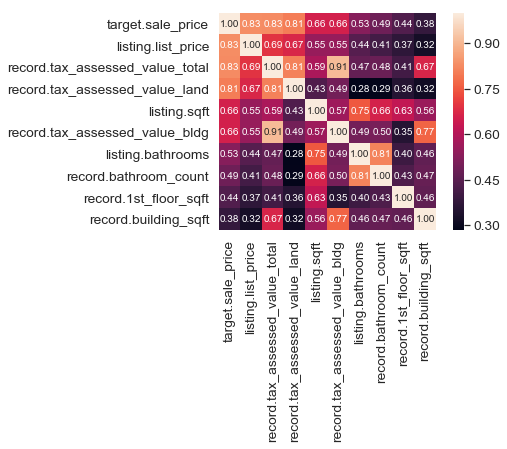

In [68]:
import numpy as np
df_n = df.dropna()
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target.sale_price')['target.sale_price'].index
cm = np.corrcoef(df_n[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
co = df[['listing.bathrooms','record.bathroom_count']].corr()
co

,listing.bathrooms,record.bathroom_count
listing.bathrooms,1.000000,0.768512
record.bathroom_count,0.768512,1.000000


In [66]:
[
       'record.tax_assessed_value_total', 'record.tax_assessed_value_bldg',
       'record.tax_assessed_value_land', 'derived.total_value_per_sqft',
       'derived.building_value_per_sqft', 'derived.land_value_per_sqft',
       'listing.hoa_fee']

(96827, 35)

In [23]:
df.shape
#ddf = df.dropna()
#ddf.shape

(106355, 35)

In [68]:
#import statsmodels.api as sm

import pandas as pd 

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.copy()
X = X.dropna()
X = X.iloc[:,:-1]
X = X.drop(['listing.property_type','listing.list_date','listing.pending_date','listing.sold_date'],axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns


vif.round(1)


C:\Users\Yi\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.000000e+00,house.id
1,1.400000e+00,house.latitude
2,1.400000e+00,house.longitude
3,1.500000e+00,house.city
4,1.300000e+00,house.zip
5,5.300000e+00,listing.list_price
6,1.100000e+00,derived.days_on_market
7,3.100000e+00,record.sqft
8,5.100000e+00,listing.sqft
9,3.200000e+00,record.1st_floor_sqft


In [74]:
X = X.drop(['record.tax_assessed_value_bldg',       'record.tax_assessed_value_land'],axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\Yi\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [75]:

vif.round(1)

,VIF Factor,features
0,4.000000,house.id
1,11.200000,house.latitude
2,8.400000,house.longitude
3,3.500000,house.city
4,4.400000,house.zip
5,5.200000,listing.list_price
6,1.300000,derived.days_on_market
7,3.100000,record.sqft
8,30.700000,listing.sqft
9,19.600000,record.1st_floor_sqft


In [35]:
X.values[0]

array([0, 0.6397208130007915, 0.2759370030988682, 2, 2, 1380000.0,
       '2017-09-14', '2017-09-26', '2017-11-15', 12.0, 'Home', 3470.0,
       3250.0, 2010.0, 0.0, 220.0, 230.0, 12164.0, 12164.0, 2010, 10154.0,
       3, 3.0, 2.5, 3.0, 1, 2018.0, 1471000.0, 786000.0, 685000.0, 423.0,
       226.0, 56.31371259454127, 24.0], dtype=object)

In [38]:
df['listing.property_type'].value_counts()

Home         93307
Townhouse    13048
Name: listing.property_type, dtype: int64

In [36]:
X.columns

Index(['house.id', 'house.latitude', 'house.longitude', 'house.city',
       'house.zip', 'listing.list_price', 'listing.list_date',
       'listing.pending_date', 'listing.sold_date', 'derived.days_on_market',
       'listing.property_type', 'record.sqft', 'listing.sqft',
       'record.1st_floor_sqft', 'record.2nd_floor_sqft', 'record.garage_sqft',
       'record.deck_sqft', 'record.lot_sqft', 'listing.lot_sqft',
       'record.building_sqft', 'derived.land_sqft', 'record.bedrooms',
       'listing.bedrooms', 'listing.bathrooms', 'record.bathroom_count',
       'record.partial_bathroom_count', 'record.tax_year_assessed',
       'record.tax_assessed_value_total', 'record.tax_assessed_value_bldg',
       'record.tax_assessed_value_land', 'derived.total_value_per_sqft',
       'derived.building_value_per_sqft', 'derived.land_value_per_sqft',
       'listing.hoa_fee'],
      dtype='object')

In [27]:
X.head()

,house.id,house.latitude,house.longitude,house.city,house.zip,listing.list_price,listing.list_date,listing.pending_date,listing.sold_date,derived.days_on_market,...,record.bathroom_count,record.partial_bathroom_count,record.tax_year_assessed,record.tax_assessed_value_total,record.tax_assessed_value_bldg,record.tax_assessed_value_land,derived.total_value_per_sqft,derived.building_value_per_sqft,derived.land_value_per_sqft,listing.hoa_fee
0,0,0.639721,0.275937,2,2,1380000.0,2017-09-14,2017-09-26,2017-11-15,12.0,...,3.0,1,2018.0,1471000.0,786000.0,685000.0,423.0,226.0,56.313713,24.0
1,1,0.544666,0.253989,5,5,475000.0,2018-08-17,2018-12-04,2018-12-28,109.0,...,3.0,2,2018.0,373000.0,173000.0,200000.0,200.0,93.0,24.906600,0.0
3,3,0.503141,0.622518,7,7,845000.0,2016-07-14,2016-07-21,2016-09-06,7.0,...,7.0,3,2018.0,1160000.0,750000.0,410000.0,197.0,127.0,1.631250,0.0
4,4,0.382359,0.043537,10,10,1198000.0,2018-09-19,2018-10-06,2018-10-31,17.0,...,5.0,4,2018.0,887000.0,745000.0,142000.0,197.0,166.0,2.884889,0.0
5,5,0.929275,0.123331,11,11,775000.0,2017-03-08,2017-03-15,2017-03-31,7.0,...,2.0,1,2018.0,844000.0,526000.0,318000.0,300.0,187.0,26.566416,0.0


In [185]:
X[['record.lot_sqft',
'listing.lot_sqft',
'record.building_sqft',
'derived.land_sqft']]

,record.lot_sqft,listing.lot_sqft,record.building_sqft,derived.land_sqft
0,12164.0,12164.0,2010,10154.0
1,8030.0,8030.0,1860,6170.0
3,251341.0,251341.0,4210,247131.0
4,49222.0,49222.0,3750,45472.0
5,11970.0,11970.0,2810,9160.0
6,4925.0,4925.0,2230,2695.0
7,21369.0,21369.0,1910,19459.0
8,5500.0,5500.0,1480,4020.0
9,12582.0,12582.0,5470,7112.0
10,7049.0,7049.0,3620,3429.0


In [187]:
X[['record.lot_sqft',
'record.building_sqft']].corr()

,record.lot_sqft,record.building_sqft
record.lot_sqft,1.000000,0.117382
record.building_sqft,0.117382,1.000000


# missing data

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
derived.building_value_per_sqft,7034,0.066137
derived.total_value_per_sqft,7034,0.066137
derived.days_on_market,2338,0.021983
derived.land_value_per_sqft,527,0.004955
house.latitude,383,0.003601
house.longitude,383,0.003601
record.deck_sqft,168,0.001580
record.tax_assessed_value_land,66,0.000621
record.tax_assessed_value_bldg,66,0.000621
record.tax_assessed_value_total,66,0.000621


In [95]:
import numpy as np
(np.array(df['record.sqft'])-np.array(df['listing.sqft']))/(0.0001+np.array(np.array(df['listing.sqft'])))
df[['record.sqft',
'listing.sqft']].corr()

,record.sqft,listing.sqft
record.sqft,1.00000,0.02235
listing.sqft,0.02235,1.00000


In [96]:
df[['record.sqft',
'listing.sqft']].head(10)

,record.sqft,listing.sqft
0,3470.0,3250.0
1,1860.0,1860.0
3,5880.0,4210.0
4,4480.0,3685.0
5,2810.0,2810.0
6,2920.0,2852.0
7,2560.0,2310.0
8,2460.0,2466.0
9,6230.0,5545.0
10,4110.0,3620.0


In [85]:
df[df['derived.building_value_per_sqft'].isnull()].iloc[0,:]

house.id                                   18
house.latitude                       0.815392
house.longitude                      0.270523
house.city                                 24
house.zip                                  28
listing.list_price                     199000
listing.list_date                  2016-04-06
listing.pending_date               2016-04-10
listing.sold_date                  2016-04-21
derived.days_on_market                      4
listing.property_type               Townhouse
record.sqft                                 0
listing.sqft                              757
record.1st_floor_sqft                       0
record.2nd_floor_sqft                       0
record.garage_sqft                          0
record.deck_sqft                            0
record.lot_sqft                        286129
listing.lot_sqft                       286129
record.building_sqft                      757
derived.land_sqft                      285372
record.bedrooms                   

In [110]:
from datetime import datetime
aa = df[df['derived.days_on_market'].isnull()].apply(lambda x:datetime.strptime(x['listing.pending_date'], '%Y-%m-%d')-datetime.strptime(x['listing.list_date'], '%Y-%m-%d'),axis = 1)
aa

79       0 days
124      0 days
200      0 days
351      0 days
368      0 days
505      0 days
556      0 days
627      0 days
722      0 days
755      0 days
888      0 days
896      0 days
906      0 days
975      0 days
1064     0 days
1198     0 days
1206     0 days
1289     0 days
1294     0 days
1309     0 days
1310     0 days
1337     0 days
1428     0 days
1445     0 days
1469     0 days
1502     0 days
1535     0 days
1556     0 days
1648     0 days
1687     0 days
          ...  
149840   0 days
149896   0 days
149961   0 days
149964   0 days
149994   0 days
150007   0 days
150044   0 days
150103   0 days
150158   0 days
150228   0 days
150343   0 days
150378   0 days
150526   0 days
150530   0 days
150568   0 days
150653   0 days
150694   0 days
150846   0 days
150928   0 days
151032   0 days
151076   0 days
151114   0 days
151148   0 days
151171   0 days
151263   0 days
151371   0 days
151421   0 days
151613   0 days
151741   0 days
151822   0 days
Length: 2338, dtype: tim

In [113]:
df['derived.building_value_per_sqft'].fillna(df[['record.tax_assessed_value_total','list_sq'].apply(lambda x:x[0]/x[1]),axis = 1 )

In [121]:
aa = df['derived.building_value_per_sqft'].fillna(df[['record.tax_assessed_value_total','listing.sqft']].apply(lambda x:x[0]/x[1],axis = 1))

C:\Users\Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [130]:
 df[df['derived.building_value_per_sqft'].isnull()]['derived.building_value_per_sqft'] = df[df['derived.building_value_per_sqft'].isnull()].loc[:,['record.tax_assessed_value_total','listing.sqft']].apply(lambda x:x[0]/x[1],axis = 1)

C:\Users\Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [159]:
np.isnan(df.iloc[22,30:35][0])

True

In [10]:
df['derived.building_value_per_sqft']  = df[['derived.building_value_per_sqft','record.tax_assessed_value_total','listing.sqft']].apply(lambda x:x[0] if not np.isnan(x[0]) else
              x[1]/x[2],axis = 1   )


C:\Users\Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [11]:
df['derived.total_value_per_sqft']  = df[['derived.total_value_per_sqft','record.tax_assessed_value_bldg','listing.sqft']].apply(lambda x:x[0] if not np.isnan(x[0]) else
              x[1]/x[2],axis = 1   )

C:\Users\Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [12]:
df['derived.days_on_market'] = df[['derived.days_on_market','listing.pending_date','listing.list_date']].apply(lambda x: x[0] if not np.isnan(x[0]) else 0,axis = 1)

In [52]:
df['derived.land_sqft'] = df['derived.land_sqft'].fillna(0)

In [7]:
df['derived.building_value_per_sqft']  = df[['derived.building_value_per_sqft','record.tax_assessed_value_bldg','listing.sqft']].apply(lambda x:x[0] if not np.isnan(x[0]) else
              x[1]/x[2],axis = 1   )
df['derived.total_value_per_sqft']  = df[['derived.total_value_per_sqft','record.tax_assessed_value_total','listing.sqft']].apply(lambda x:x[0] if not np.isnan(x[0]) else
              x[1]/x[2],axis = 1   )
df['derived.days_on_market'] = df[['derived.days_on_market','listing.pending_date','listing.list_date']].apply(lambda x: x[0] if not np.isnan(x[0]) else 0,axis = 1)
df['derived.land_sqft'] = df['derived.land_sqft'].fillna(0)


C:\Users\zhy89\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\zhy89\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\zhy89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [309]:
df[df['derived.land_value_per_sqft'].isnull()][['derived.land_value_per_sqft','record.tax_assessed_value_land','record.lot_sqft','listing.lot_sqft']]

,derived.land_value_per_sqft,record.tax_assessed_value_land,record.lot_sqft,listing.lot_sqft


In [308]:
df[df['derived.land_value_per_sqft'].isnull()][['derived.land_value_per_sqft','record.tax_assessed_value_land','record.lot_sqft','listing.lot_sqft']]

,derived.land_value_per_sqft,record.tax_assessed_value_land,record.lot_sqft,listing.lot_sqft


In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
derived.land_value_per_sqft,527,0.004955
house.latitude,383,0.003601
house.longitude,383,0.003601
record.deck_sqft,168,0.001580
derived.building_value_per_sqft,71,0.000668
record.tax_year_assessed,66,0.000621
derived.total_value_per_sqft,66,0.000621
record.tax_assessed_value_land,66,0.000621
record.tax_assessed_value_bldg,66,0.000621
record.tax_assessed_value_total,66,0.000621


In [9]:
df.shape

(106355, 35)

In [10]:
df  = df.dropna()

# there's days on market < 0, there's 0 square foot room

In [11]:
df = df[(df['derived.days_on_market']>=0) &( df['record.sqft']>0)&(df['listing.sqft']>0)]

In [12]:
df.shape

(98333, 35)

In [21]:
df.describe().iloc[-1,:]

house.id                           1.228780e+05
house.latitude                     1.000000e+00
house.longitude                    1.000000e+00
house.city                         1.270000e+02
house.zip                          1.930000e+02
listing.list_price                 9.250000e+07
derived.days_on_market             1.164000e+03
record.sqft                        2.288417e+06
listing.sqft                       2.523800e+04
record.1st_floor_sqft              1.620000e+04
record.2nd_floor_sqft              1.235000e+04
record.garage_sqft                 7.504000e+03
record.deck_sqft                   1.049100e+04
record.lot_sqft                    2.288417e+06
listing.lot_sqft                   3.546912e+06
record.building_sqft               2.559480e+05
derived.land_sqft                  2.287207e+06
record.bedrooms                    3.600000e+01
listing.bedrooms                   1.200000e+01
listing.bathrooms                  8.500000e+00
record.bathroom_count              5.000

In [198]:
df.columns

Index(['house.id', 'house.latitude', 'house.longitude', 'house.city',
       'house.zip', 'listing.list_price', 'listing.list_date',
       'listing.pending_date', 'listing.sold_date', 'derived.days_on_market',
       'listing.property_type', 'record.sqft', 'listing.sqft',
       'record.1st_floor_sqft', 'record.2nd_floor_sqft', 'record.garage_sqft',
       'record.deck_sqft', 'record.lot_sqft', 'listing.lot_sqft',
       'record.building_sqft', 'derived.land_sqft', 'record.bedrooms',
       'listing.bedrooms', 'listing.bathrooms', 'record.bathroom_count',
       'record.partial_bathroom_count', 'record.tax_year_assessed',
       'record.tax_assessed_value_total', 'record.tax_assessed_value_bldg',
       'record.tax_assessed_value_land', 'derived.total_value_per_sqft',
       'derived.building_value_per_sqft', 'derived.land_value_per_sqft',
       'listing.hoa_fee', 'target.sale_price'],
      dtype='object')

## outlier

In [14]:
cols = []
for i,d in enumerate(df.dtypes):
    if d is not df['listing.property_type'].dtypes:
        cols.append(df.columns[i])
len(cols)

31

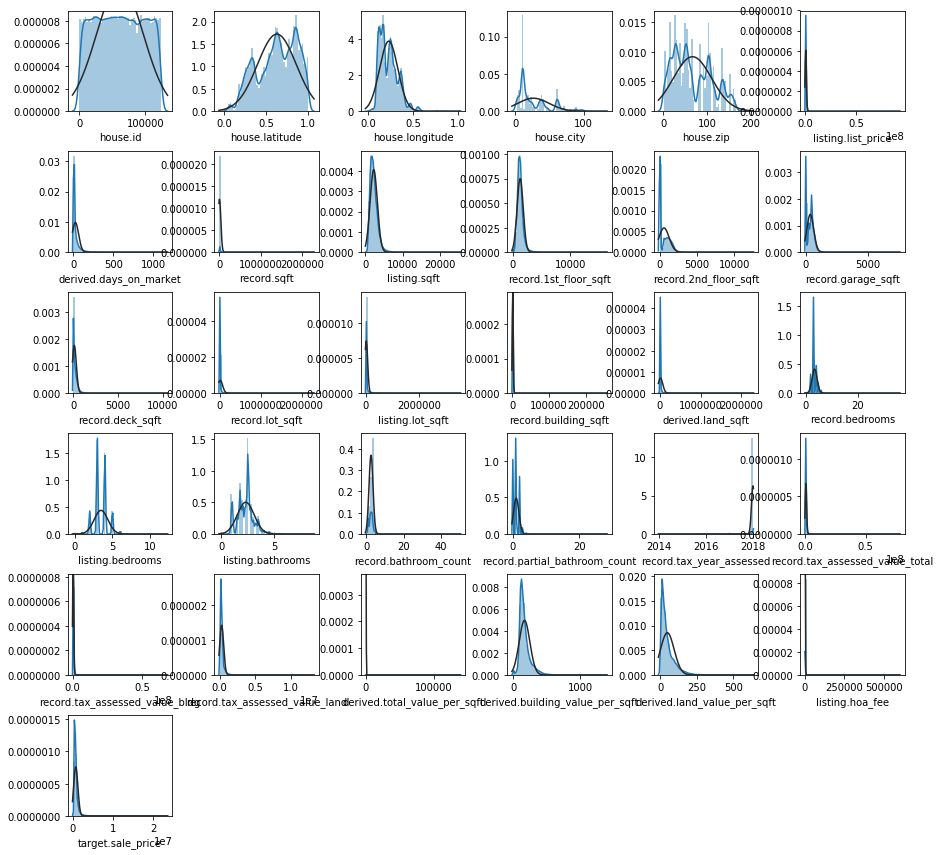

In [319]:
#fig, axes = plt.subplots(nrows=6, ncols=6)
fig = plt.figure(figsize=(15, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

from scipy.stats import norm
from scipy import stats
for i,item in enumerate(cols):
    #sns.distplot(df[item], fit=norm);
    #fig = plt.subplot()
    fig.add_subplot(8, 6, i+1)
    sns.distplot(df[item], fit=norm)
    #plt.subplot(6, 6, i)
#res = stats.probplot(df['derived.total_value_per_sqft'], plot=plt)


## delelte outliers, criteria is largest is twice than second largest

In [16]:
for item in cols:
    if(df[item].sort_values().iloc[-1]/df[item].sort_values().iloc[-2]) > 2:
        print(df[item].sort_values()[-4:])
        #df = df.drop(df[df[item]>df[item].sort_values().iloc[-2]].index)

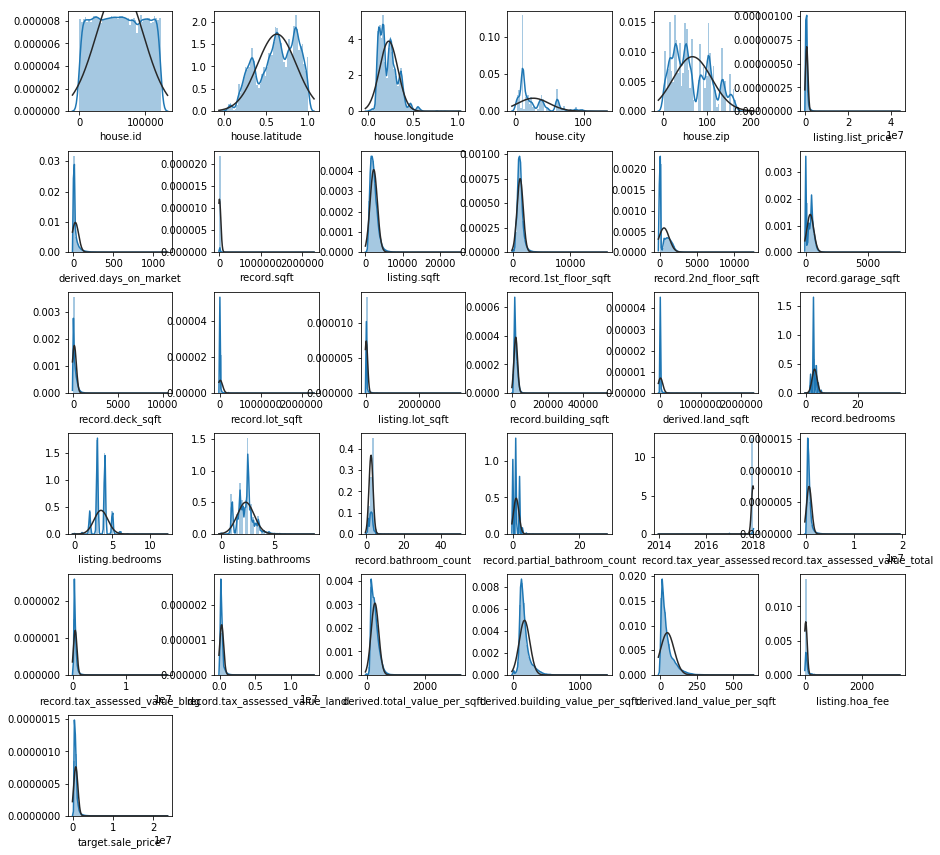

In [261]:
#fig, axes = plt.subplots(nrows=6, ncols=6)
fig = plt.figure(figsize=(15, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

from scipy.stats import norm
from scipy import stats
for i,item in enumerate(cols):
    #sns.distplot(df[item], fit=norm);
    #fig = plt.subplot()
    fig.add_subplot(8, 6, i+1)
    sns.distplot(df[item], fit=norm)
    #plt.subplot(6, 6, i)
#res = stats.probplot(df['derived.total_value_per_sqft'], plot=plt)


In [17]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
target.sale_price,0,0.0
listing.sold_date,0,0.0
record.2nd_floor_sqft,0,0.0
record.1st_floor_sqft,0,0.0
listing.sqft,0,0.0
record.sqft,0,0.0
listing.property_type,0,0.0
derived.days_on_market,0,0.0
listing.pending_date,0,0.0
record.deck_sqft,0,0.0


In [264]:
df['listing.hoa_fee'].describe()

count    98327.000000
mean        16.182747
std         51.418709
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3331.000000
Name: listing.hoa_fee, dtype: float64

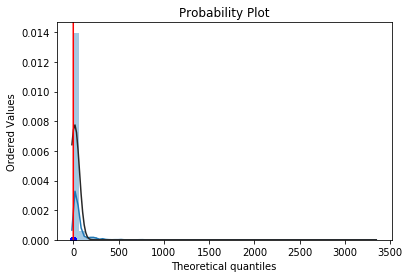

In [262]:
    #sns.distplot(df[item], fit=norm);
    #fig = plt.subplot()
#fig.add_subplot(8, 6, i+1)
sns.distplot(df['listing.hoa_fee'], fit=norm)
    #plt.subplot(6, 6, i)
res = stats.probplot(df['listing.hoa_fee'], plot=plt)


In [266]:
aa['target.sale_price'] = np.log(aa['target.sale_price'])


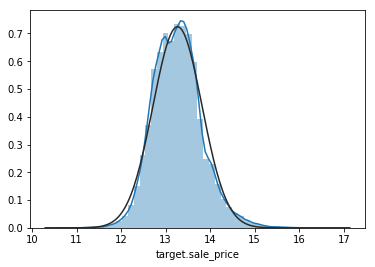

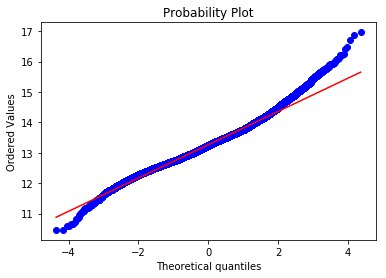

In [267]:
sns.distplot(aa['target.sale_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(aa['target.sale_price'], plot=plt)

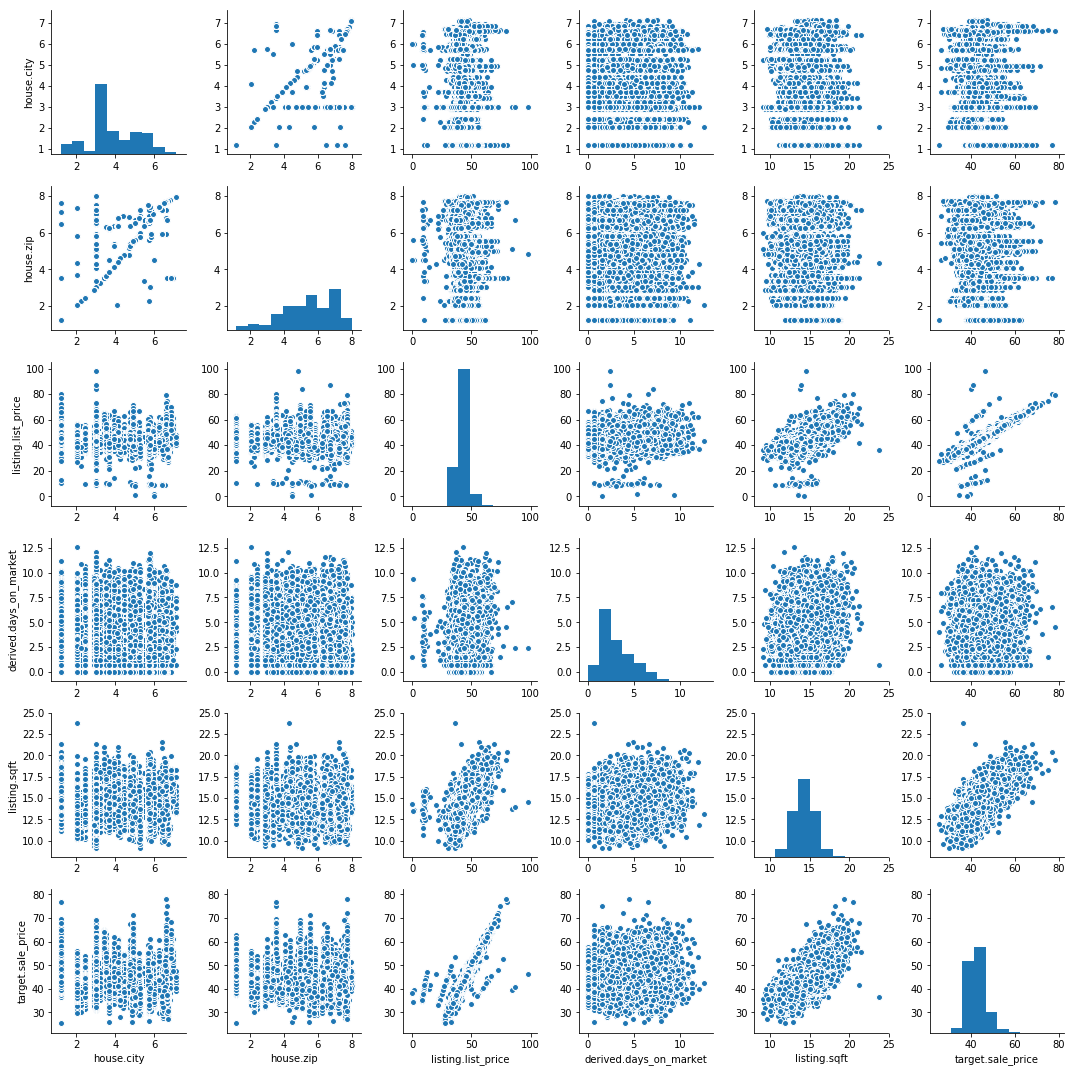

In [27]:
df_toplot = df[['house.city','house.zip','listing.list_price','derived.days_on_market', 'listing.sqft','target.sale_price']]
sns.pairplot(df_toplot)

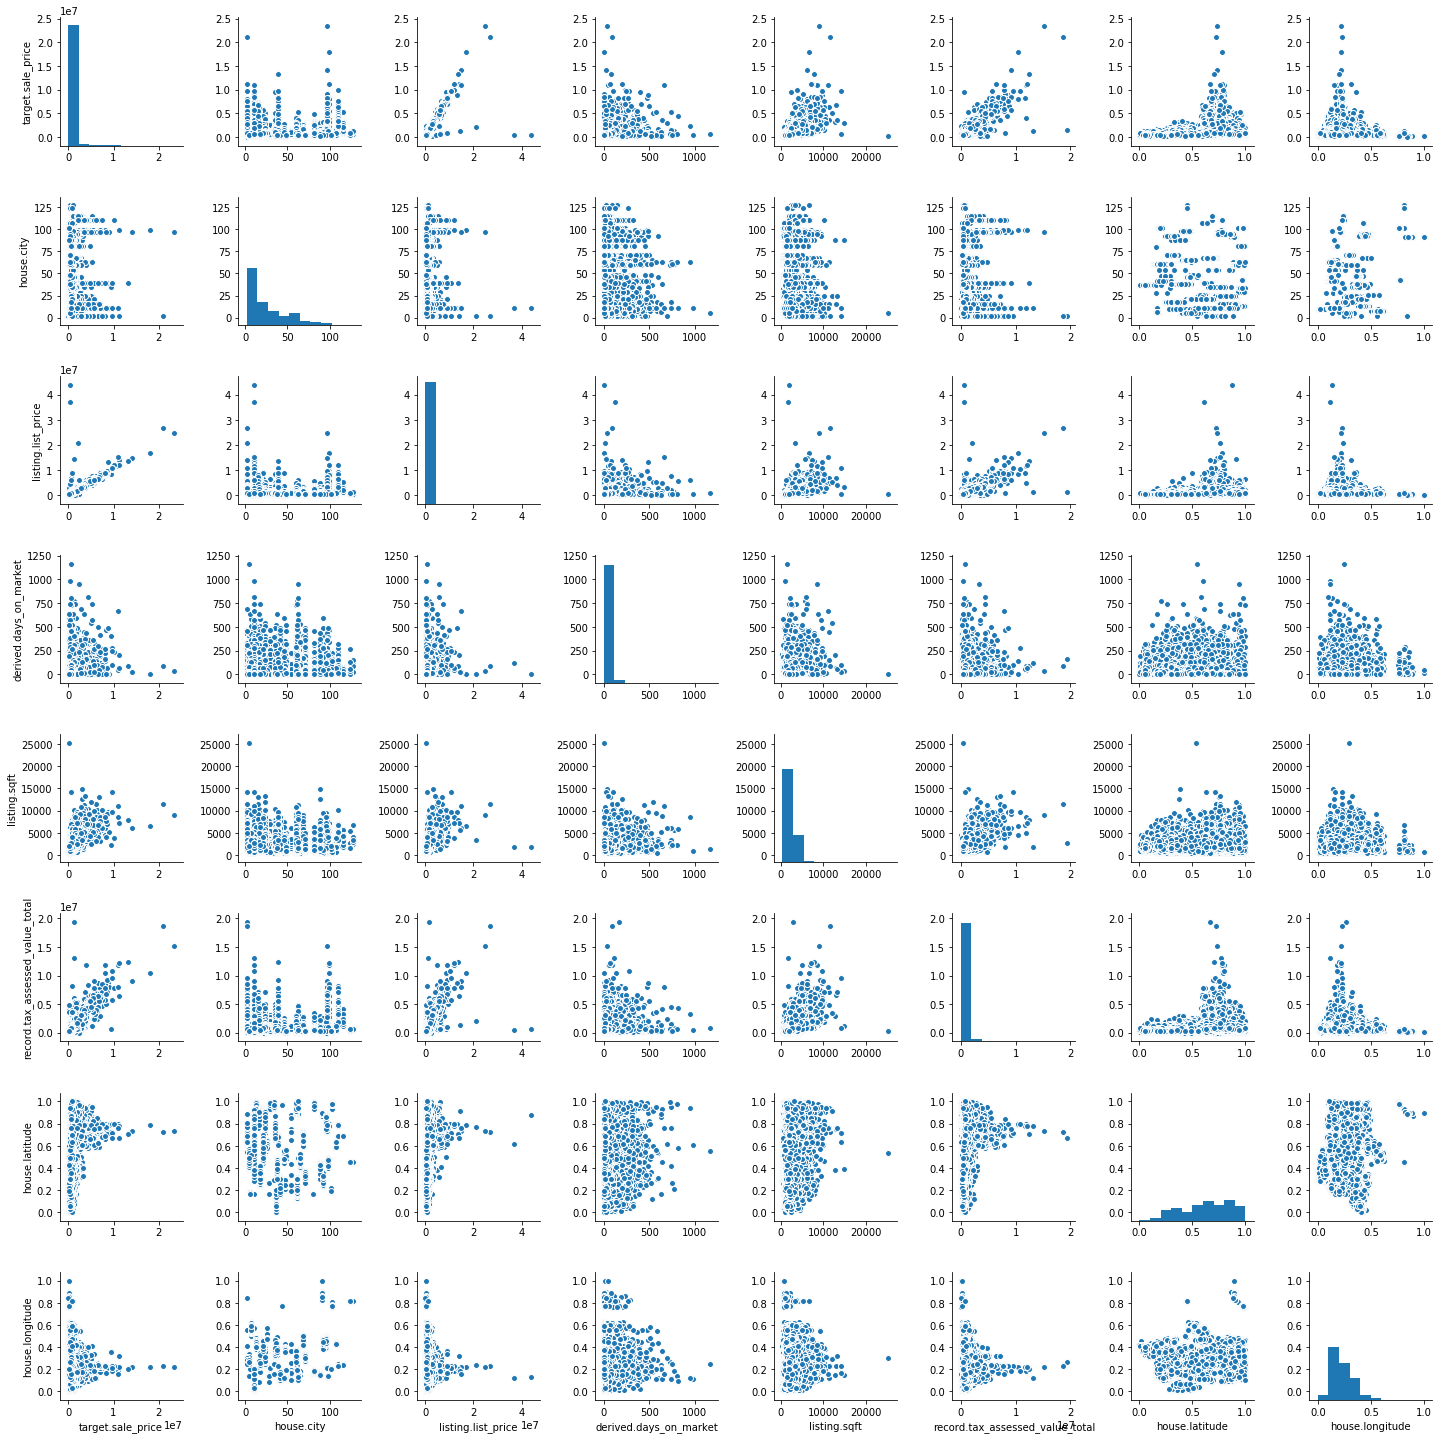

In [269]:
df_toplot = df[['target.sale_price','house.city','listing.list_price','derived.days_on_market', 
                'listing.sqft','record.tax_assessed_value_total','house.latitude','house.longitude'
               ]]
sns.pairplot(df_toplot)

In [ ]:
df_toplot = df[['house.city','house.zip','listing.list_price','derived.days_on_market', 'listing.sqft',
        'listing.lot_sqft',
       'record.building_sqft', 'derived.land_sqft', 
       'listing.bedrooms', 'listing.bathrooms', 
       'record.tax_assessed_value_total',  'derived.total_value_per_sqft',
       'derived.building_value_per_sqft', 'derived.land_value_per_sqft',
        'target.sale_price']]
sns.pairplot(df_toplot)

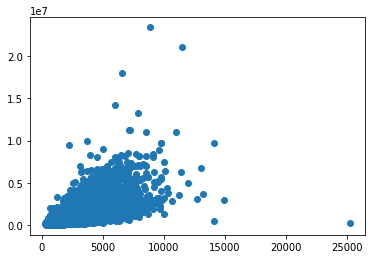

In [324]:
#listing.sqft
#aa = df[df['derived.days_on_market']>=0]

plt.scatter(df['listing.sqft'], df['target.sale_price']);

In [213]:
df['derived.days_on_market'].describe()

count    105318.000000
mean         22.628155
std         249.047349
min      -79416.000000
25%           5.000000
50%           8.000000
75%          25.000000
max        1164.000000
Name: derived.days_on_market, dtype: float64

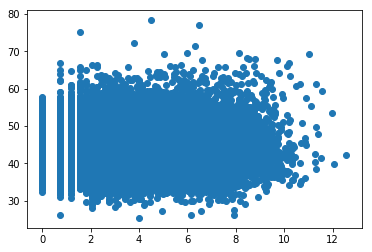

In [28]:
aa = df[df['derived.days_on_market']>=0]

plt.scatter(aa['derived.days_on_market'], (aa['target.sale_price']));

In [325]:
df_original = df.copy()

## box transform

In [18]:
from scipy.stats import norm, skew 

numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(50)



Skew in numerical features: 



,Skew
record.sqft,52.413578
listing.lot_sqft,19.013342
derived.land_sqft,18.103169
record.lot_sqft,18.013926
listing.list_price,12.996763
listing.hoa_fee,10.339295
record.building_sqft,8.606862
record.tax_assessed_value_land,6.908984
target.sale_price,6.309535
record.tax_assessed_value_bldg,6.019048


In [19]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

There are 31 skewed numerical features to Box Cox transform


In [21]:
df.head()
df = df.dropna()

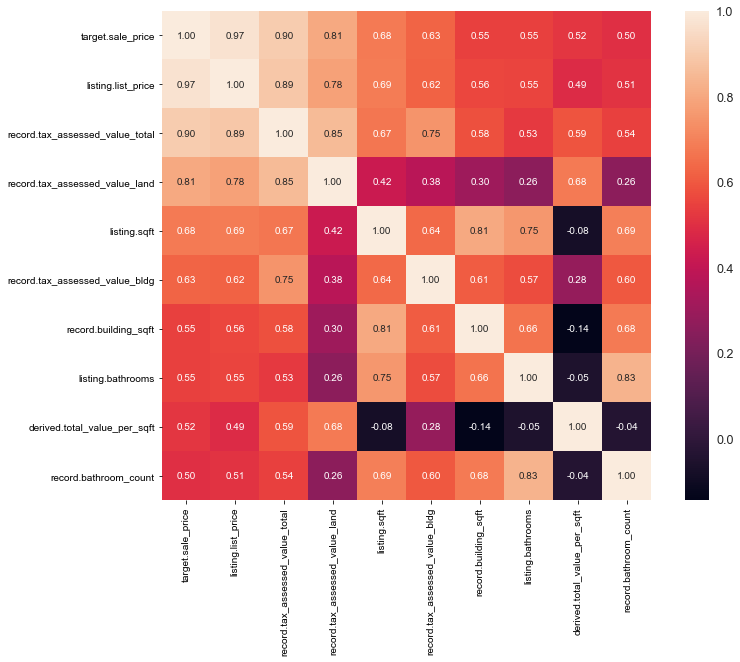

In [62]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, vmax=.8, square=True)


df_n = df.dropna()
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target.sale_price')['target.sale_price'].index
cm = np.corrcoef(df_n[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [64]:
#import pandas as pd 

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.copy()
X = X.dropna()
X = X.iloc[:,:-1]
#X = X.drop(['listing.property_type','listing.list_date','listing.pending_date','listing.sold_date'],axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns


vif.round(1)

,VIF Factor,features
0,19.5,house.latitude
1,11.9,house.longitude
2,13.9,house.city
3,18.4,house.zip
4,2131.3,listing.list_price
5,5.2,derived.days_on_market
6,1365.1,record.sqft
7,1143.1,listing.sqft
8,598.4,record.1st_floor_sqft
9,9.5,record.2nd_floor_sqft


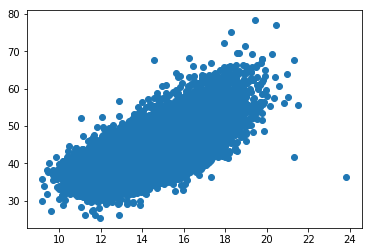

In [330]:
plt.scatter(df['listing.sqft'], (df['target.sale_price']));

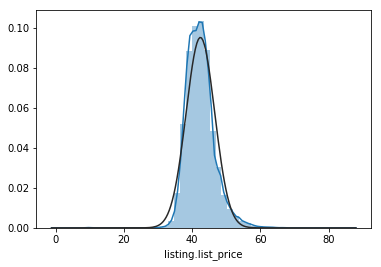

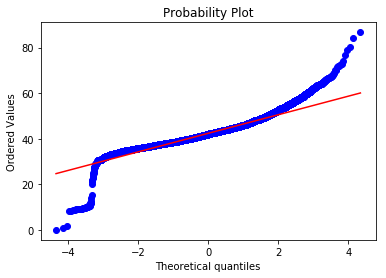

In [277]:
sns.distplot(df['listing.list_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['listing.list_price'], plot=plt)

## pairplot after transform

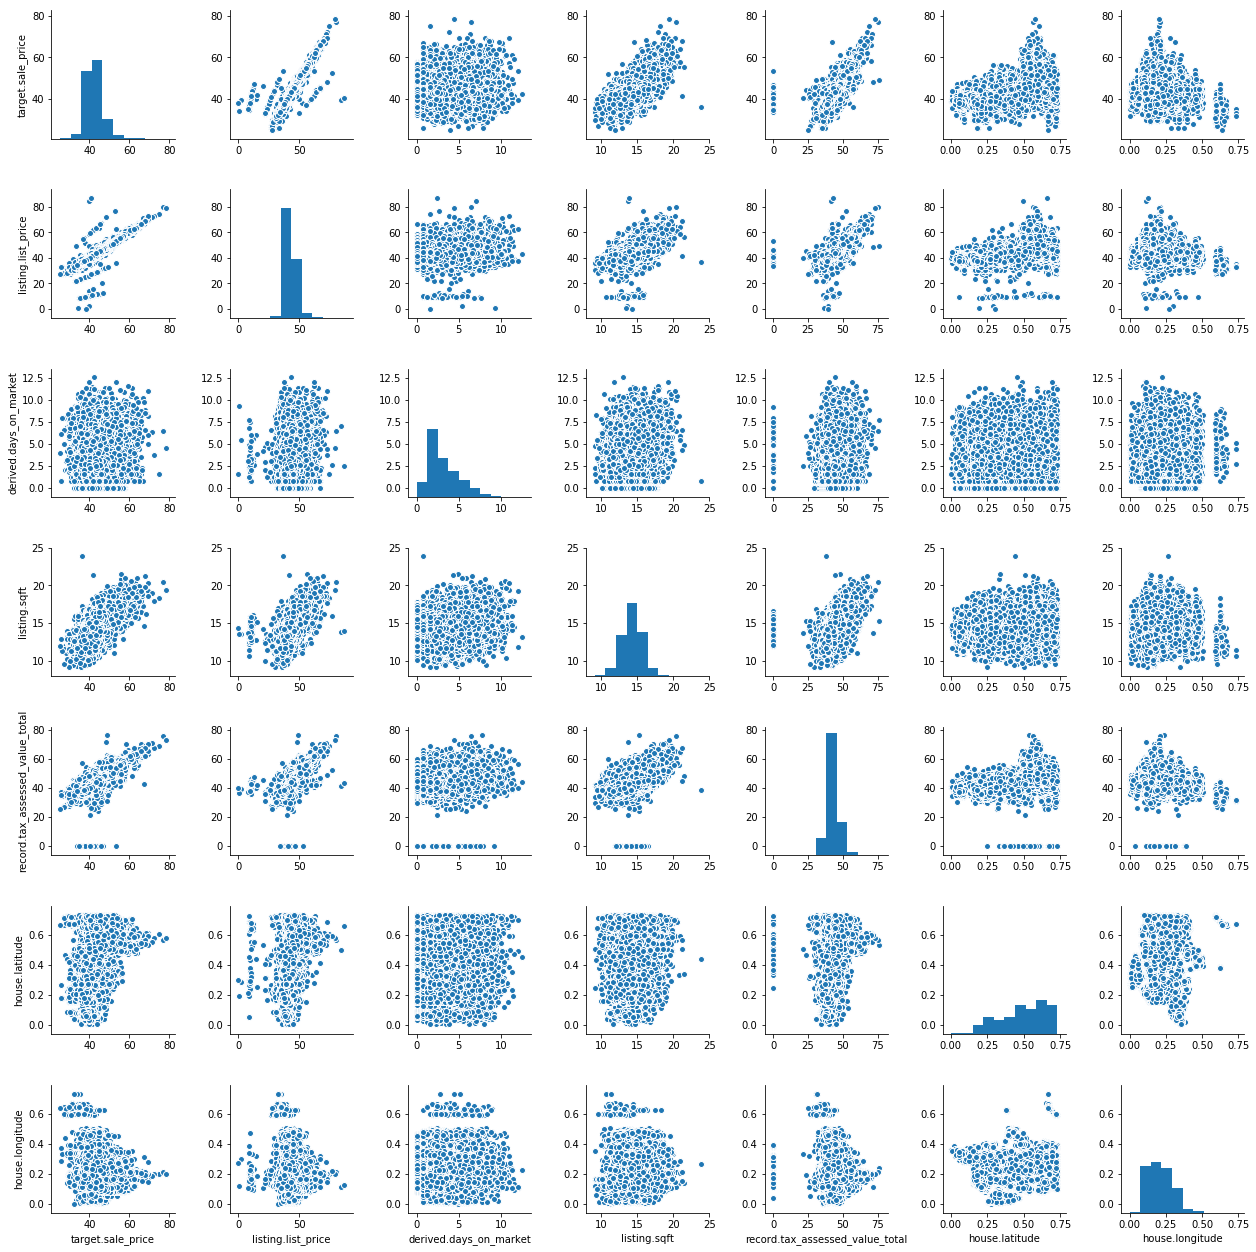

In [360]:
df_toplot = df[['target.sale_price','listing.list_price','derived.days_on_market', 
                'listing.sqft','record.tax_assessed_value_total','house.latitude','house.longitude'
               ]]
sns.pairplot(df_toplot)

# Modeltraining

In [22]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
#import xgboost as xgb
#import lightgbm as lgb

In [23]:
df = df.drop(['listing.list_date',
       'listing.pending_date', 'listing.sold_date','house.id'],axis = 1)

df = pd.get_dummies(df)

In [25]:
df.columns

Index(['house.latitude', 'house.longitude', 'house.city', 'house.zip',
       'listing.list_price', 'derived.days_on_market', 'record.sqft',
       'listing.sqft', 'record.1st_floor_sqft', 'record.2nd_floor_sqft',
       'record.garage_sqft', 'record.deck_sqft', 'record.lot_sqft',
       'listing.lot_sqft', 'record.building_sqft', 'derived.land_sqft',
       'record.bedrooms', 'listing.bedrooms', 'listing.bathrooms',
       'record.bathroom_count', 'record.partial_bathroom_count',
       'record.tax_year_assessed', 'record.tax_assessed_value_total',
       'record.tax_assessed_value_bldg', 'record.tax_assessed_value_land',
       'derived.total_value_per_sqft', 'derived.building_value_per_sqft',
       'derived.land_value_per_sqft', 'listing.hoa_fee', 'target.sale_price',
       'listing.property_type_Home', 'listing.property_type_Townhouse'],
      dtype='object')

In [280]:
df.describe().iloc[[3,7],:].iloc[1,:]

house.id                           31.999435
house.latitude                      0.730463
house.longitude                     0.730463
house.city                          7.136866
house.zip                           8.025268
listing.list_price                 86.748897
derived.days_on_market             12.557947
record.sqft                        53.290216
listing.sqft                       23.827696
record.1st_floor_sqft              21.865846
record.2nd_floor_sqft              20.727876
record.garage_sqft                 18.755429
record.deck_sqft                   20.065705
record.lot_sqft                    53.290216
listing.lot_sqft                   57.363749
record.building_sqft               27.454803
derived.land_sqft                  53.285460
record.bedrooms                     4.792130
listing.bedrooms                    3.128239
listing.bathrooms                   2.678075
record.bathroom_count               5.357203
record.partial_bathroom_count       4.380946
record.tax

In [24]:
training = df.drop(['target.sale_price'],axis = 1)
y_train = df['target.sale_price']


In [347]:
aa0.shape

(95451, 32)

In [28]:
df.isnull().any()

house.latitude                     False
house.longitude                    False
house.city                         False
house.zip                          False
listing.list_price                 False
derived.days_on_market             False
record.sqft                        False
listing.sqft                       False
record.1st_floor_sqft              False
record.2nd_floor_sqft              False
record.garage_sqft                 False
record.deck_sqft                   False
record.lot_sqft                    False
listing.lot_sqft                   False
record.building_sqft               False
derived.land_sqft                  False
record.bedrooms                    False
listing.bedrooms                   False
listing.bathrooms                  False
record.bathroom_count              False
record.partial_bathroom_count      False
record.tax_year_assessed           False
record.tax_assessed_value_total    False
record.tax_assessed_value_bldg     False
record.tax_asses

In [25]:

n_folds = 5

def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(training.values)
    mae= np.sqrt(-cross_val_score(model, training.values, y_train, scoring="neg_median_absolute_error", cv = kf))
    return(mae)

In [30]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [358]:
lasso.fit(training, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lasso',
                 Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=1, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [31]:
#y_train = df['target.sale_price']

score = mae_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.5755 (0.0042)



In [354]:
rfd = RandomForestRegressor(n_estimators=40)

score = mae_cv(rfd)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.4878 (0.0008)



In [355]:
GBoost = GradientBoostingRegressor(n_estimators=40, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = mae_cv(GBoost)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.7943 (0.0033)



In [356]:
GBoost = GradientBoostingRegressor(n_estimators=40)
score = mae_cv(GBoost)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.5042 (0.0033)



In [47]:
KN = KNeighborsRegressor(n_neighbors=100)
score = mae_cv(KN)
print("\K Nearest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

\K Nearest score: 0.7573 (0.0034)



In [48]:
KN = KNeighborsRegressor(n_neighbors=1000)
score = mae_cv(KN)
print("\nK Nearest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


K Nearest score: 0.8622 (0.0057)



In [60]:
rfd = RandomForestRegressor(n_estimators=400)


rfd.fit(training, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [61]:
rfd.predict(training)

array([48.33748607, 39.77886435, 45.15731542, ..., 38.68146272,
       44.00443971, 37.35921693])

In [69]:
rfd = RandomForestRegressor(n_estimators=4)

training2 = training.drop('house.city',axis = 1)
rfd.fit(training2, y_train)
rfd.predict(training2)

np.sum((rfd.predict(training2)-y_train)**2)

7051.049655880543

In [66]:
np.sum((rfd.predict(training)-y_train)**2)

6819.354711808041

In [67]:
forknn.to_csv('knn.csv')
#y_train.to_csv('ytrain.csv')

In [66]:
training.head()

,house.latitude,house.longitude,house.city,house.zip,listing.list_price,derived.days_on_market,record.sqft,listing.sqft,record.1st_floor_sqft,record.2nd_floor_sqft,...,record.tax_year_assessed,record.tax_assessed_value_total,record.tax_assessed_value_bldg,record.tax_assessed_value_land,derived.total_value_per_sqft,derived.building_value_per_sqft,derived.land_value_per_sqft,listing.hoa_fee,listing.property_type_Home,listing.property_type_Townhouse
0,0.513330,0.248189,1.194318,1.194318,48.909764,3.128239,15.978574,15.757240,14.198437,0.000000,...,14.210867,49.444679,44.409960,43.367010,9.853469,8.375577,5.569560,4.137711,1,0
1,0.449300,0.230215,2.055642,2.055642,40.693467,6.826617,13.957229,13.957229,13.957229,0.000000,...,14.210867,39.006933,34.035360,34.930482,8.103594,6.512196,4.195596,0.000000,1,0
3,0.420272,0.501980,2.440268,2.440268,44.967518,2.440268,17.842380,16.644635,14.540127,14.135652,...,14.210867,47.480719,44.052022,39.659512,8.070314,7.136866,1.041180,0.000000,1,0
4,0.331784,0.042752,2.885846,2.885846,47.743157,3.618223,16.862957,16.183640,15.411404,11.574819,...,14.210867,45.344591,44.001159,32.847466,8.070314,7.698683,1.505092,0.000000,1,0
5,0.690623,0.117319,3.011340,3.011340,44.302095,2.440268,15.273396,15.273396,15.273396,0.000000,...,14.210867,44.958348,41.423549,37.926983,9.025890,7.956197,4.297252,0.000000,1,0


In [31]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80],#, 90, 100, 110],
    'max_features':[2],#, 3],
    'min_samples_leaf': [30, 40, 50],
    'min_samples_split': [8],#, 10, 12],
    'n_estimators': [40, 50, 60]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [32]:
grid_search.fit(forknn, y_train)
#grid_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [33]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 30,
 'min_samples_split': 8,
 'n_estimators': 60}

In [34]:
rfd = RandomForestRegressor(bootstrap= True,
 max_depth = 80,
 max_features = 2,
 min_samples_leaf = 30,
 min_samples_split = 8,
 n_estimators = 60)

In [35]:
rfd.fit(training, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=30, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# cleaning and prepare for test label

In [68]:
#train$fold <- h2o.kfold_column(train, nfolds=5, seed = 1234)

# Fit the target encoding map
te_map <- h2o.target_encode_fit(train, x = list("addr_state"),
                                y = response, fold_column = "fold")

In [140]:
test['derived.building_value_per_sqft']  = test[['derived.building_value_per_sqft','record.tax_assessed_value_bldg','listing.sqft']].apply(lambda x:x[0] if not np.isnan(x[0]) else
              x[1]/x[2],axis = 1   )
test['derived.total_value_per_sqft']  = test[['derived.total_value_per_sqft','record.tax_assessed_value_total','listing.sqft']].apply(lambda x:x[0] if not np.isnan(x[0]) else
              x[1]/x[2],axis = 1   )
test['derived.days_on_market'] = test[['derived.days_on_market','listing.pending_date','listing.list_date']].apply(lambda x: x[0] if not np.isnan(x[0]) else 0,axis = 1)
test['derived.land_sqft'] = test['derived.land_sqft'].fillna(0)


test_col = test.columns[test.isnull().any()]
for item in test_col:
    if test[item].dtypes != 'object':
        test[item] = test[item].fillna(test[item].mean())
test = test.drop(['listing.list_date',
       'listing.pending_date', 'listing.sold_date'],axis = 1)

C:\Users\zhy89\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\zhy89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [141]:
test.drop(['house.id'],axis = 1,inplace = True)

In [142]:
test = test.replace([np.inf, -np.inf], np.nan)


In [143]:
test['derived.total_value_per_sqft'].fillna(training['derived.total_value_per_sqft'].mean(),inplace = True)

In [144]:
test['derived.building_value_per_sqft'].fillna(training['derived.building_value_per_sqft'].mean(),inplace = True)

In [155]:
test.isnull().any()

house.latitude                     False
house.longitude                    False
house.city                         False
house.zip                          False
listing.list_price                 False
derived.days_on_market             False
record.sqft                        False
listing.sqft                       False
record.1st_floor_sqft              False
record.2nd_floor_sqft              False
record.garage_sqft                 False
record.deck_sqft                   False
record.lot_sqft                    False
listing.lot_sqft                   False
record.building_sqft               False
derived.land_sqft                  False
record.bedrooms                    False
listing.bedrooms                   False
listing.bathrooms                  False
record.bathroom_count              False
record.partial_bathroom_count      False
record.tax_year_assessed           False
record.tax_assessed_value_total    False
record.tax_assessed_value_bldg     False
record.tax_asses

In [146]:
from scipy.stats import norm, skew 

numeric_feats = test.dtypes[test.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(50)



Skew in numerical features: 



,Skew
record.sqft,38.431824
derived.total_value_per_sqft,18.763848
listing.lot_sqft,13.210555
derived.land_sqft,12.353308
record.lot_sqft,12.349295
record.tax_assessed_value_land,7.639143
listing.list_price,7.198032
record.tax_assessed_value_total,5.745878
record.tax_assessed_value_bldg,4.297155
listing.hoa_fee,4.203503


In [148]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    test[feat] = boxcox1p(test[feat], lam)

There are 29 skewed numerical features to Box Cox transform


In [154]:
test['derived.days_on_market'] = test['derived.days_on_market'].fillna(0)
test['derived.land_sqft'] = test['derived.land_sqft'].fillna(0)

In [149]:
test = pd.get_dummies(test)

In [150]:
training.shape

(95453, 31)

In [151]:
test.shape

(12821, 31)

In [102]:
for item in test.columns:
    if item not in training.columns:
        print (item)

house.id


In [73]:
test[test['derived.building_value_per_sqft']>40] = test['derived.building_value_per_sqft'].mean()


# Result

In [156]:
#test_pre = rfd.predict(test_data)

from scipy.special import boxcox1p, inv_boxcox1p

test_final = inv_boxcox1p(rfd.predict(test),lam)

In [129]:
test_final

array([404408.32505342, 529440.7711847 , 853006.20409354, ...,
       488145.15960205, 535206.86139484, 463653.88570214])

In [157]:
test_final

array([404408.32505342, 529440.7711847 , 853006.20409354, ...,
       488145.15960205, 535206.86139484, 463653.88570214])

In [159]:
sub = pd.DataFrame({'id': test.index, 'SalePrice' : test_final})
#sub.index = test.index
#sub['SalePrice'] = test_final
sub.to_csv('submission.csv',index=False)

# future exploration and idea

In [81]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,18 mins 45 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_Yi_06c4ub
H2O cluster total nodes:,1
H2O cluster free memory:,2.645 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [94]:
df.to_csv('test_clean.csv')

In [93]:
df['house.city'] = train['house.city']

In [86]:
training_or = h2o.import_file("test_clean.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [91]:
predictor = ['house.city']
response =['target.sale_price']
# Fit the target encoding map
from h2o.targetencoder import TargetEncoder
target_encoder = TargetEncoder(x=predictor, y=response,
                               fold_column="fold",
                               blended_avg= True,
                               inflection_point = 3,
                               smoothing = 1,
                               seed=1234)
#target_encoder.fit(training_or)

In [121]:
training_or = h2o.import_file("test_clean.csv")


fold = training_or.kfold_column(n_folds=5, seed=1234)
fold.set_names(["fold"])
training_or = training_or.cbind(fold)

#training['fold'] =np.random.randint(5, size=training.shape[0])# Set the predictor to be "addr_state"
predictor = ['house.city']
response =['target.sale_price']
# Fit the target encoding map
from h2o.targetencoder import TargetEncoder
target_encoder = TargetEncoder(x=predictor, y=response,
                               fold_column="fold",
                               blended_avg= True,
                               inflection_point = 3,
                               smoothing = 1,
                               seed=1234)
target_encoder.fit(training_or)

Parse progress: |█████████████████████████████████████████████████████████| 100%


H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Expected a String but found a class water.rapids.vals.ValStrs
  Request: POST /99/Rapids
    data: {'ast': "(target.encoder.fit (tmp= py_6_sid_867b (cbind test_clean5.hex py_5_sid_867b)) ['house.city'] ['target.sale_price'] 'fold')", 'session_id': '_sid_867b'}


In [165]:
df['house.city']  = train['house.city']#.apply(lambda x:'a'+str(x))

In [166]:
df.head()

,house.id,house.latitude,house.longitude,house.city,house.zip,listing.list_price,listing.list_date,listing.pending_date,listing.sold_date,derived.days_on_market,...,record.partial_bathroom_count,record.tax_year_assessed,record.tax_assessed_value_total,record.tax_assessed_value_bldg,record.tax_assessed_value_land,derived.total_value_per_sqft,derived.building_value_per_sqft,derived.land_value_per_sqft,listing.hoa_fee,target.sale_price
0,0,0.639721,0.275937,2,2,1380000.0,2017-09-14,2017-09-26,2017-11-15,12.0,...,1,2018.0,1471000.0,786000.0,685000.0,423.0,226.0,56.313713,24.0,1370000.0
1,1,0.544666,0.253989,5,5,475000.0,2018-08-17,2018-12-04,2018-12-28,109.0,...,2,2018.0,373000.0,173000.0,200000.0,200.0,93.0,24.906600,0.0,405000.0
3,3,0.503141,0.622518,7,7,845000.0,2016-07-14,2016-07-21,2016-09-06,7.0,...,3,2018.0,1160000.0,750000.0,410000.0,197.0,127.0,1.631250,0.0,845000.0
4,4,0.382359,0.043537,10,10,1198000.0,2018-09-19,2018-10-06,2018-10-31,17.0,...,4,2018.0,887000.0,745000.0,142000.0,197.0,166.0,2.884889,0.0,1198000.0
5,5,0.929275,0.123331,11,11,775000.0,2017-03-08,2017-03-15,2017-03-31,7.0,...,1,2018.0,844000.0,526000.0,318000.0,300.0,187.0,26.566416,0.0,762500.0


In [162]:
df.to_csv('df_ori.csv')

In [26]:
rfd = RandomForestRegressor(n_estimators=40)
rfd.fit(training, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
import pandas as pd
feature_importances = pd.DataFrame(rfd.feature_importances_,
                                   index = training.columns,
                                    columns=['importance']).sort_values('importance',  
                                                                        ascending=False)
feature_importances

,importance
listing.list_price,0.972713
derived.days_on_market,0.007105
record.tax_assessed_value_total,0.005087
record.tax_assessed_value_land,0.002914
house.latitude,0.001089
house.longitude,0.000988
listing.sqft,0.000869
record.1st_floor_sqft,0.000814
record.tax_assessed_value_bldg,0.000783
derived.total_value_per_sqft,0.000729


In [28]:
forknn = training[feature_importances.index[:7]]

In [39]:
forknn.head()

,listing.list_price,derived.days_on_market,record.tax_assessed_value_total,record.tax_assessed_value_land,house.latitude,listing.sqft,house.longitude
0,48.909764,3.128239,49.444679,43.367010,0.513330,15.757240,0.248189
1,40.693467,6.826617,39.006933,34.930482,0.449300,13.957229,0.230215
3,44.967518,2.440268,47.480719,39.659512,0.420272,16.644635,0.501980
4,47.743157,3.618223,45.344591,32.847466,0.331784,16.183640,0.042752
5,44.302095,2.440268,44.958348,37.926983,0.690623,15.273396,0.117319


In [ ]:
filename = 'random_forest.sav'
pickle.dump(rfd, open(filename, 'wb'))

In [29]:
#import KNeighborsClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#Setup arrays to store training and test accuracies
neighbors = [1000]#,20,30,40]#np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #Fit the model
    knn.fit(forknn, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(forknn, y_train)
    
    #Compute accuracy on the test set

MemoryError: Unable to allocate array with shape (95453, 1000) and data type int64

In [42]:
train_accuracy

array([0.96312387])

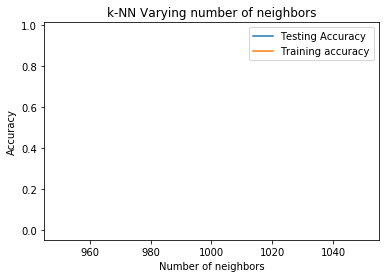

In [41]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
forknn_norm = min_max_scaler.fit_transform(forknn)

In [44]:
#import KNeighborsClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#Setup arrays to store training and test accuracies
neighbors = [1000]#,20,30,40]#np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #Fit the model
    knn.fit(forknn_norm, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(forknn_norm, y_train)
    
    #Compute accuracy on the test set

In [45]:
train_accuracy

array([0.86654651])

# Results